In [18]:
import pandas as pd
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Relevant Links

- [DOE Public Data Catalog](https://www.energy.gov/data/articles/open-data-catalogue)
- [REMS Query Tool](https://www.energy.gov/ehss/occupational-radiation-exposure-rems-system-tools)

In [3]:
# Read in formatted parquet
df = pd.read_parquet("rems-data.parquet")
df.head()

,Monitoring Year,Program Office,Operations Office,Site,Reporting Organization,Facility Type,Labor Category,Occupation,Monitoring Status,Total Number Monitored,...,CED 20 - 100,CED 100 - 250,CED 250 - 500,CED 500 - 750,CED 750 - 1000,CED 1000 - 2000,CED 2000 - 3000,CED 3000 - 4000,CED 4000 - 5000,CED >= 5000
0,1986,National Nuclear Security Administration,ALBUQUERQUE,Los Alamos National Laboratory,Los Alamos National Laboratory,OTHER,Unknown,Unknown,Employee,1,...,0,0,0,0,0,0,0,0,0,0
1,1986,National Nuclear Security Administration,ALBUQUERQUE,Pantex Plant,NNSA Production Office - Pantex Site,OTHER,Unknown,Unknown,Employee,1129,...,0,0,0,0,0,0,0,0,0,0
2,1986,National Nuclear Security Administration,OAK RIDGE,Oak Ridge: Y-12 National Security Complex,"CNS, LLC - Y-12",WEAPONS FABRICATION AND TEST,Unknown,Unknown,Employee,1008,...,0,0,0,0,0,0,0,0,0,0
3,1986,National Nuclear Security Administration,OAKLAND,Lawrence Livermore National Laboratory,Lawrence Livermore National Laboratory,OTHER,Unknown,Unknown,Employee,756,...,0,0,0,0,0,0,0,0,0,0
4,1986,National Nuclear Security Administration,SAVANNAH RIVER,Savannah River Site,Savannah River Nuclear Solutions,OTHER,Misc.,Miscellaneous,Employee,502,...,0,1,0,0,0,0,0,0,0,0


<BarContainer object of 11 artists>

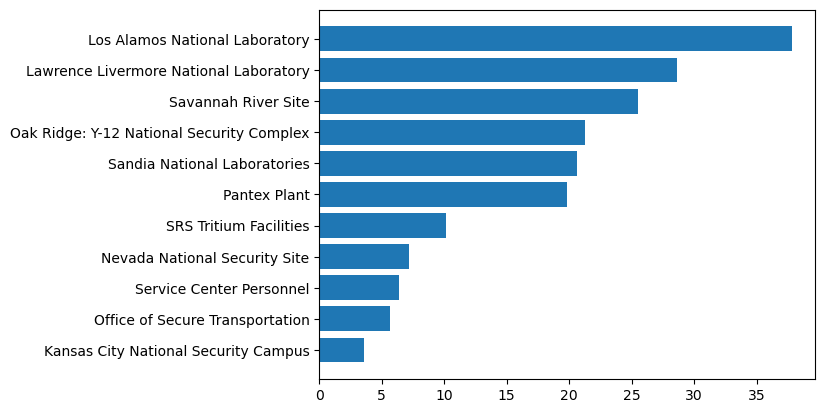

In [36]:
# Plotting mean total effective dose by site (NNSA sites only)
mean_ted_by_site = df.loc[df['Program Office'] == "National Nuclear Security Administration"].groupby("Site")["Average Meas. TED (mrem)"].mean().sort_values()

mean_ted_by_site

plt.barh(mean_ted_by_site.index, mean_ted_by_site.values)

<BarContainer object of 10 artists>

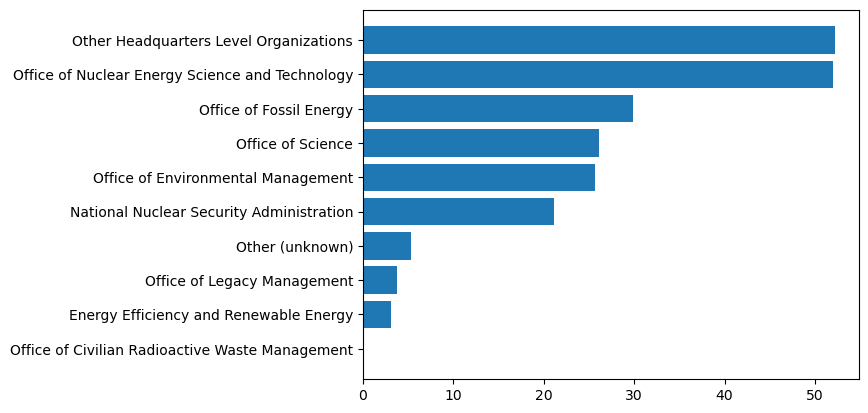

In [37]:
# Plotting mean total effective dose by program office
mean_ted_by_office = df.groupby("Program Office")["Average Meas. TED (mrem)"].mean().sort_values()

mean_ted_by_office

plt.barh(mean_ted_by_office.index, mean_ted_by_office.values)

In [ ]:
# Set up train-test split
response_col = 'Average Meas. TED (mrem)'
feature_cols = list(df.columns)
feature_cols.remove('Average Meas. TED (mrem)')

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols], df[response_col], test_size=0.33, random_state=42)

In [38]:
ohe = OneHotEncoder()
tsvd = TruncatedSVD(n_components=50, random_state=42)
pipeline = Pipeline([("Encoder", ohe), ("Truncated SVD", tsvd)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Encoder', OneHotEncoder()),
                ('Truncated SVD',
                 TruncatedSVD(n_components=50, random_state=42))])